# 1. Set up and load the data

In [1]:
# Set up the required imports.

import time
from functools import partial
from multiprocessing import Pool, cpu_count

import decoupler as dc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pertpy as pt
import scanpy as sc
from scipy import stats

from typing import Dict, Tuple, Optional

/home/ktsukanov/repositories/PerturbationCatalogue/data_exploration/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define dataset name.

DATASET = 'adamson_2016_pilot_curated'
# DATASET = 'adamson_2016_upr_epistasis_curated'
# DATASET = 'adamson_2016_upr_perturb_seq_curated'
# DATASET = 'datlinger_2017_curated'

In [3]:
# Load the h5ad file.

adata = sc.read_h5ad(f'{DATASET}.h5ad')

/home/ktsukanov/repositories/PerturbationCatalogue/data_exploration/env/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
# Overview of the file.

adata

AnnData object with n_obs × n_vars = 5752 × 35635
    obs: 'perturbation_name', 'perturbed_target_number', 'perturbed_target_ensg', 'perturbed_target_symbol', 'perturbed_target_category', 'perturbation_type_label', 'perturbation_type_id', 'timepoint', 'treatment_label', 'treatment_id', 'model_system_label', 'model_system_id', 'species', 'tissue_label', 'tissue_id', 'cell_type_label', 'cell_type_id', 'cell_line_label', 'cell_line_id', 'sex_label', 'sex_id', 'developmental_stage_label', 'developmental_stage_id', 'disease_term_label', 'disease_term_id'
    var: 'ensembl_gene_id', 'symbol'

In [5]:
# High level look at the observations.

adata.obs

,perturbation_name,perturbed_target_number,perturbed_target_ensg,perturbed_target_symbol,perturbed_target_category,perturbation_type_label,perturbation_type_id,timepoint,treatment_label,treatment_id,...,cell_type_label,cell_type_id,cell_line_label,cell_line_id,sex_label,sex_id,developmental_stage_label,developmental_stage_id,disease_term_label,disease_term_id
cell_barcode,,,,,,,,,,,,,,,,,,,,,
AAACATACACCGAT,CREB1_pDS269,1,ENSG00000118260,CREB1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACAGAGAT,SNAI1_pDS266,1,ENSG00000124216,SNAI1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACCAGAAA,62(mod)_pBA581,1,control,control,control,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACGTTGAC,EP300_pDS268,1,ENSG00000100393,EP300,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACTGTTCT,62(mod)_pBA581,1,control,control,control,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTGGAAGGC,SNAI1_pDS266,1,ENSG00000124216,SNAI1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
TTTGACTGGACGAG,SNAI1_pDS266,1,ENSG00000124216,SNAI1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
TTTGCATGCCCGTT,SNAI1_pDS266,1,ENSG00000124216,SNAI1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996


In [6]:
# High level look at the genes.

adata.var

,ensembl_gene_id,symbol
0,ENSG00000243485,MIR1302-2HG
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8
...,...,...
35630,ENSG00000212907,MT-ND4L
35631,ENSG00000198886,MT-ND4
35632,ENSG00000198786,MT-ND5
35633,ENSG00000198695,MT-ND6


# 2. Perturbed genes statistics

Total number of distinct perturbed genes: 7
First 10 perturbed genes: ['CREB1', 'SNAI1', 'EP300', 'ZNF326', 'BHLHE40', 'SPI1', 'DDIT3']


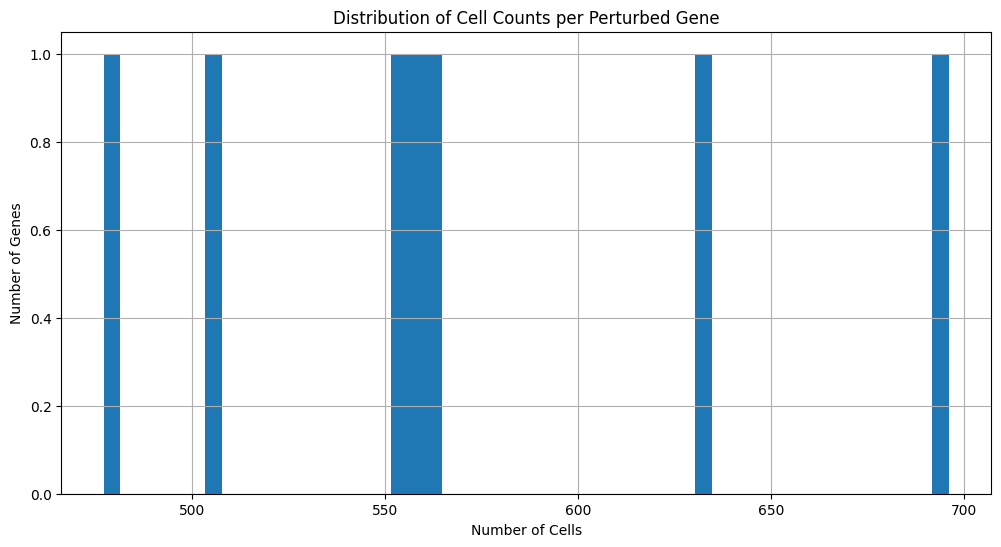


Statistics of cells per perturbed gene:
count      7.000000
mean     569.000000
std       74.139508
min      477.000000
25%      529.500000
50%      557.000000
75%      597.000000
max      696.000000
Name: count, dtype: float64


In [7]:
# Get all unique perturbation targets (including 'control')
all_targets = adata.obs['perturbed_target_symbol'].unique()

# Filter out 'control' to get only perturbed genes
perturbed_targets = [t for t in all_targets if t != 'control']
num_perturbed_genes = len(perturbed_targets)

print(f"Total number of distinct perturbed genes: {num_perturbed_genes}")
print("First 10 perturbed genes:", perturbed_targets[:10])

# Count number of cells per perturbed gene
target_counts = adata.obs['perturbed_target_ensg'].value_counts()

# Remove 'control' from the counts for plotting
perturbation_counts = target_counts[target_counts.index != 'control']

# Plot histogram
plt.figure(figsize=(12, 6))
perturbation_counts.hist(bins=50)
plt.title('Distribution of Cell Counts per Perturbed Gene')
plt.xlabel('Number of Cells')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()

# Show some statistics
print("\nStatistics of cells per perturbed gene:")
print(perturbation_counts.describe())

# 3. Cell type statistics

Total number of distinct cell types: 1
All cell types: ['lymphoblast']
Categories (1, object): ['lymphoblast']


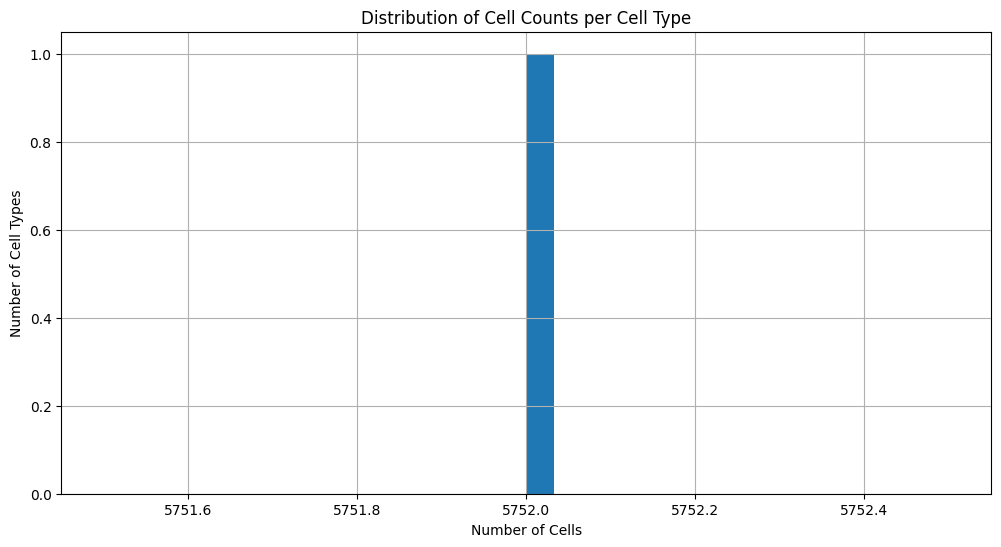

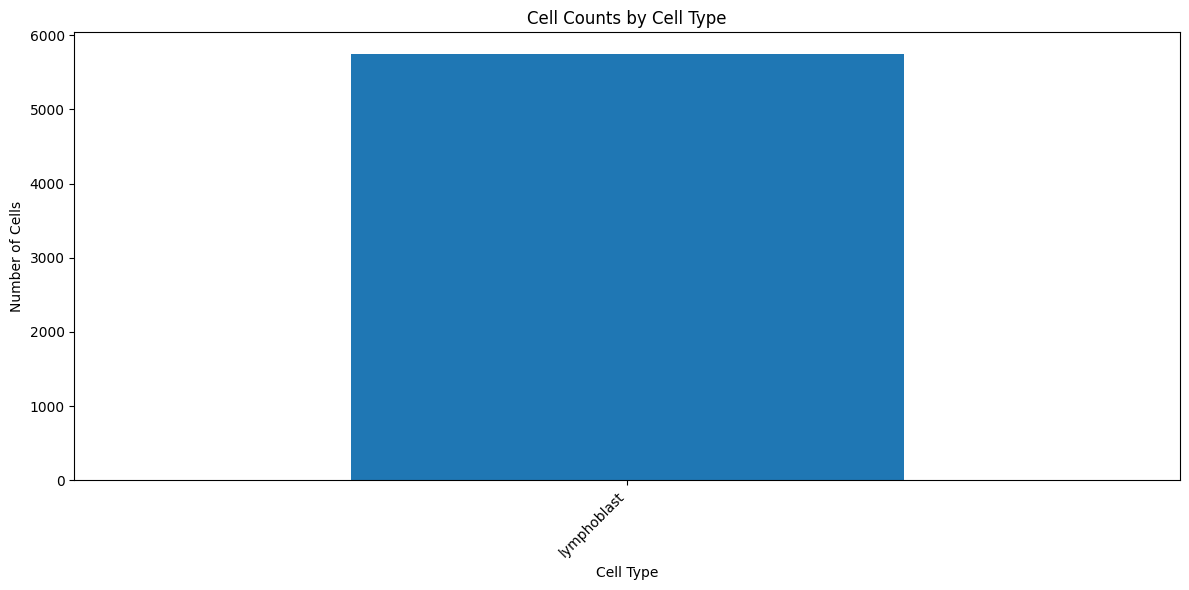


Statistics of cells per cell type:
count       1.0
mean     5752.0
std         NaN
min      5752.0
25%      5752.0
50%      5752.0
75%      5752.0
max      5752.0
Name: count, dtype: float64

Complete cell type distribution:
cell_type_label
lymphoblast    5752
Name: count, dtype: int64


In [8]:
# Get all unique cell types
cell_types = adata.obs['cell_type_label'].unique()
num_cell_types = len(cell_types)

print(f"Total number of distinct cell types: {num_cell_types}")
print("All cell types:", cell_types)

# Count number of cells per cell type
cell_type_counts = adata.obs['cell_type_label'].value_counts()

# Plot histogram
plt.figure(figsize=(12, 6))
cell_type_counts.hist(bins=30)
plt.title('Distribution of Cell Counts per Cell Type')
plt.xlabel('Number of Cells')
plt.ylabel('Number of Cell Types')
plt.grid(True)
plt.show()

# Plot as bar chart for better readability
plt.figure(figsize=(12, 6))
cell_type_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Cell Counts by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show some statistics
print("\nStatistics of cells per cell type:")
print(cell_type_counts.describe())

# Show the complete distribution
print("\nComplete cell type distribution:")
print(cell_type_counts)

# 4. Levels of expression of control genes

Original data shape: (5752, 35635)
Control data shape: (1769, 35635)
Number of genes: 35635
Mean expression range: 0.0000 to 196.2532


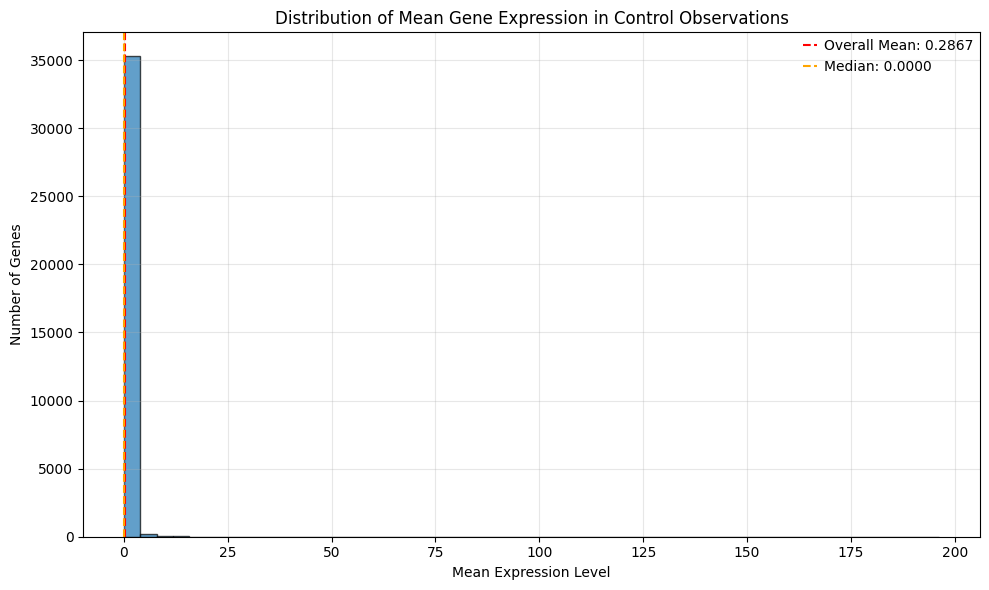


Summary statistics for mean gene expression:
Mean: 0.2867
Median: 0.0000
Standard deviation: 3.0848
25th percentile: 0.0000
75th percentile: 0.0300

No common housekeeping genes found in the dataset.
Available gene names (first 20): ['MIR1302-2HG', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8', 'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2', 'RP4-669L17.10', 'OR4F29', 'RP4-669L17.2', 'RP5-857K21.15', 'RP5-857K21.1', 'RP5-857K21.2', 'RP5-857K21.3', 'RP5-857K21.4', 'RP5-857K21.5', 'OR4F16', 'RP11-206L10.3']
You may need to check the gene naming convention (e.g., ENSEMBL IDs vs gene symbols)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Filter adata to keep only control observations
control_mask = adata.obs['perturbed_target_symbol'] == 'control'
adata_control = adata[control_mask, :].copy()

print(f"Original data shape: {adata.shape}")
print(f"Control data shape: {adata_control.shape}")

# Calculate mean expression per gene across control observations
mean_expression = np.array(adata_control.X.mean(axis=0)).flatten()

print(f"Number of genes: {len(mean_expression)}")
print(f"Mean expression range: {mean_expression.min():.4f} to {mean_expression.max():.4f}")

# Create histogram of mean gene expression values
plt.figure(figsize=(10, 6))
plt.hist(mean_expression, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Expression Level')
plt.ylabel('Number of Genes')
plt.title('Distribution of Mean Gene Expression in Control Observations')
plt.grid(True, alpha=0.3)

# Add some summary statistics to the plot
plt.axvline(np.mean(mean_expression), color='red', linestyle='--', 
           label=f'Overall Mean: {np.mean(mean_expression):.4f}')
plt.axvline(np.median(mean_expression), color='orange', linestyle='--', 
           label=f'Median: {np.median(mean_expression):.4f}')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print(f"\nSummary statistics for mean gene expression:")
print(f"Mean: {np.mean(mean_expression):.4f}")
print(f"Median: {np.median(mean_expression):.4f}")
print(f"Standard deviation: {np.std(mean_expression):.4f}")
print(f"25th percentile: {np.percentile(mean_expression, 25):.4f}")
print(f"75th percentile: {np.percentile(mean_expression, 75):.4f}")

# Find a highly expressed housekeeping gene
housekeeping_genes = ['ACTB', 'GAPDH', 'B2M', 'HPRT1', 'TBP', 'RPLP0', 'RPL13A', 
                     'PPIA', 'YWHAZ', 'GUSB', 'TFRC', 'PGK1', 'LDHA', '18S', 'TUBB']

# Check which housekeeping genes are present in the data
available_hk_genes = []
for gene in housekeeping_genes:
    if gene in adata_control.var.symbol:
        gene_idx = adata_control.var.symbol.get_loc(gene)
        mean_expr = mean_expression[gene_idx]
        available_hk_genes.append((gene, mean_expr))

if available_hk_genes:
    # Sort by mean expression and pick the highest one
    available_hk_genes.sort(key=lambda x: x[1], reverse=True)
    selected_gene, selected_mean = available_hk_genes[0]
    
    print(f"\nAvailable housekeeping genes and their mean expression:")
    for gene, expr in available_hk_genes:
        print(f"  {gene}: {expr:.4f}")
    
    print(f"\nSelected highly expressed housekeeping gene: {selected_gene} (mean: {selected_mean:.4f})")
    
    # Get expression values for the selected gene across all control cells
    gene_idx = adata_control.var.symbol.get_loc(selected_gene)
    # Handle both sparse and dense matrices
    if hasattr(adata_control.X, 'toarray'):
        # Sparse matrix
        gene_expression = adata_control.X[:, gene_idx].toarray().flatten()
    else:
        # Dense matrix
        gene_expression = np.array(adata_control.X[:, gene_idx]).flatten()
    
    # Plot distribution of the selected housekeeping gene
    plt.figure(figsize=(10, 6))
    plt.hist(gene_expression, bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    plt.xlabel('Expression Level')
    plt.ylabel('Number of Cells')
    plt.title(f'Distribution of {selected_gene} Expression in Control Cells')
    plt.grid(True, alpha=0.3)
    
    # Add summary statistics to the plot
    plt.axvline(np.mean(gene_expression), color='red', linestyle='--', 
               label=f'Mean: {np.mean(gene_expression):.4f}')
    plt.axvline(np.median(gene_expression), color='orange', linestyle='--', 
               label=f'Median: {np.median(gene_expression):.4f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for the selected gene
    print(f"\nSummary statistics for {selected_gene} expression:")
    print(f"Mean: {np.mean(gene_expression):.4f}")
    print(f"Median: {np.median(gene_expression):.4f}")
    print(f"Standard deviation: {np.std(gene_expression):.4f}")
    print(f"Min: {np.min(gene_expression):.4f}")
    print(f"Max: {np.max(gene_expression):.4f}")
    print(f"Number of cells: {len(gene_expression)}")
    
else:
    print(f"\nNo common housekeeping genes found in the dataset.")
    print("Available gene names (first 20):", list(adata_control.var.symbol[:20]))
    print("You may need to check the gene naming convention (e.g., ENSEMBL IDs vs gene symbols)")

# 5. Pseudobulk differential expression

In [10]:
def _compute_ttest_chunk(args):
    """Helper function for parallel t-test computation"""
    X_control, X_perturbed, gene_indices = args
    pvalues = []
    
    for gene_idx in gene_indices:
        control_vals = X_control[:, gene_idx]
        perturbed_vals = X_perturbed[:, gene_idx]
                
        try:
            _, pval = stats.ttest_ind(perturbed_vals, control_vals)
            pvalues.append(pval)
        except:
            pvalues.append(1.0)
    
    return pvalues

In [11]:
def compute_pseudobulk_perturbation_analysis(
    adata, 
    perturbation_col: str = "perturbed_target_symbol",
    control_label: str = "control",  # or "non-targeting", adjust as needed
    min_cells_per_group: int = 10,
    log_transform: bool = True,
    n_jobs: int = -1,
    chunk_size: int = 500,
    min_expression_threshold: float = 10.0
) -> pd.DataFrame:
    """
    Compute pseudobulk analysis for perturbation data with parallel processing.
    
    Parameters:
    -----------
    adata : AnnData
        Annotated data object with perturbation expression results
    perturbation_col : str
        Column name in adata.obs containing perturbation target symbols
    control_label : str
        Label used for control/non-targeting samples
    min_cells_per_group : int
        Minimum number of cells required per perturbation group
    log_transform : bool
        Whether to log-transform the data before analysis
    n_jobs : int
        Number of parallel jobs (-1 for all cores)
    chunk_size : int
        Number of genes to process per chunk in parallel
    min_expression_threshold : float
        Minimum pseudobulk control expression to include gene in analysis
        
    Returns:
    --------
    pd.DataFrame
        Results with columns: perturbation, gene, log2fc, pvalue, padj, mean_control, mean_perturbed
    """
    
    start_time = time.time()
    print(f"Starting pseudobulk analysis...")
    print(f"Dataset shape: {adata.shape}")
    
    # Check if perturbation column exists
    if perturbation_col not in adata.obs.columns:
        raise ValueError(f"Column '{perturbation_col}' not found in adata.obs")
    
    print(f"✓ Found perturbation column: {perturbation_col}")
    
    # Get expression data
    print("📊 Loading expression data...")
    if hasattr(adata.X, 'toarray'):
        X = adata.X.toarray()  # Convert sparse to dense if needed
        print("  Converted sparse matrix to dense")
    else:
        X = adata.X
    
    # Log transform if requested and data doesn't appear to be log-transformed
    if log_transform and np.max(X) > 20:  # Simple check for non-log data
        print("🔄 Applying log1p transformation...")
        X = np.log1p(X)
        print("  ✓ Log transformation complete")
    else:
        print("  Data appears already log-transformed or log_transform=False")
    
    # Get perturbation labels
    print("🏷️  Processing perturbation labels...")
    perturbations = adata.obs[perturbation_col].values
    unique_perturbations = np.unique(perturbations)
    print(f"  Found {len(unique_perturbations)} unique perturbations")
    
    # Filter out perturbations with too few cells
    print(f"🔍 Filtering perturbations (min {min_cells_per_group} cells)...")
    valid_perturbations = []
    for pert in unique_perturbations:
        cell_count = np.sum(perturbations == pert)
        if cell_count >= min_cells_per_group:
            valid_perturbations.append(pert)
            print(f"  ✓ {pert}: {cell_count} cells")
        else:
            print(f"  ✗ Skipping {pert}: only {cell_count} cells")
    
    if control_label not in valid_perturbations:
        raise ValueError(f"Control label '{control_label}' not found or has too few cells")
    
    print(f"✓ Will analyze {len(valid_perturbations)} perturbations")
    
    # Compute pseudobulk (mean expression per perturbation)
    print("🧮 Computing pseudobulk (mean expression per perturbation)...")
    pseudobulk_data = {}
    for i, pert in enumerate(valid_perturbations):
        print(f"  Processing {i+1}/{len(valid_perturbations)}: {pert}")
        mask = perturbations == pert
        pseudobulk_data[pert] = np.mean(X[mask, :], axis=0)
    
    print("***")
    print(valid_perturbations)
    
    return pseudobulk_data
    
    # Convert to DataFrame for easier handling
    pseudobulk_df = pd.DataFrame(pseudobulk_data, index=adata.var.symbol)
    print(f"✓ Pseudobulk computed. Shape: {pseudobulk_df.shape}")
    
    # Set up parallel processing
    if n_jobs == -1:
        n_jobs = cpu_count()
    print(f"⚡ Setting up parallel processing with {n_jobs} cores")
    
    # Compute statistics for each perturbation vs control
    print("📈 Computing differential expression statistics...")
    results = []
    control_expression = pseudobulk_df[control_label].values
    num_of_controls = len(control_expression)
    control_mask = perturbations == control_label
    X_control = X[control_mask, :]
    
    # Filter genes by expression threshold
    print(f"🔍 Filtering genes with control expression > {min_expression_threshold}")
    
    # Apply log1p to threshold if data was log-transformed
    if log_transform and np.max(X) <= 20:  # Data was log-transformed
        threshold_to_use = np.log1p(min_expression_threshold)
        print(f"  Using log1p-adjusted threshold: {threshold_to_use:.3f} (original: {min_expression_threshold})")
    else:
        threshold_to_use = min_expression_threshold
        print(f"  Using original threshold: {threshold_to_use}")
    
    expressed_genes_mask = control_expression * num_of_controls > threshold_to_use
    n_expressed = np.sum(expressed_genes_mask)
    print(f"  ✓ {n_expressed}/{len(control_expression)} genes pass expression threshold")
    
    if n_expressed == 0:
        raise ValueError(f"No genes pass expression threshold {min_expression_threshold}")
    
    for pert_idx, pert in enumerate(valid_perturbations):
        if pert == control_label:
            continue
            
        print(f"  Processing perturbation {pert_idx+1}/{len(valid_perturbations)}: {pert}")
        
        perturbed_expression = pseudobulk_df[pert].values
        perturbed_mask = perturbations == pert
        X_perturbed = X[perturbed_mask, :]
        
        # Filter for expressed genes only
        control_expr_filtered = control_expression[expressed_genes_mask]
        perturbed_expr_filtered = perturbed_expression[expressed_genes_mask]
        X_control_filtered = X_control[:, expressed_genes_mask]
        X_perturbed_filtered = X_perturbed[:, expressed_genes_mask]
        expressed_gene_names = adata.var.symbol[expressed_genes_mask].tolist()  # Convert to list to preserve strings
        
        # Compute log2 fold change (vectorized)
        print("    Computing fold changes...")
        pseudocount = 1e-8
        log2fc = np.log2((perturbed_expr_filtered + pseudocount) / (control_expr_filtered + pseudocount))
        
        # Parallel t-test computation
        print(f"    Computing p-values using {n_jobs} cores...")
        n_genes_filtered = X_control_filtered.shape[1]
        
        # Create chunks for parallel processing
        gene_chunks = [list(range(i, min(i + chunk_size, n_genes_filtered))) 
                      for i in range(0, n_genes_filtered, chunk_size)]
        
        print(f"    Split {n_genes_filtered} expressed genes into {len(gene_chunks)} chunks")
        
        # Prepare arguments for parallel processing
        args_list = [(X_control_filtered, X_perturbed_filtered, chunk) for chunk in gene_chunks]
        
        # Run parallel t-tests
        with Pool(n_jobs) as pool:
            chunk_results = pool.map(_compute_ttest_chunk, args_list)
        
        # Flatten results
        pvalues = []
        for chunk_pvals in chunk_results:
            pvalues.extend(chunk_pvals)
        
        pvalues = np.array(pvalues)
        print(f"    ✓ Computed {len(pvalues)} p-values")
        
        # Multiple testing correction (Benjamini-Hochberg)
        print("    Applying multiple testing correction...")
        from statsmodels.stats.multitest import multipletests
        
        # Handle NaN p-values before correction
        valid_pvals = ~np.isnan(pvalues)
        if np.sum(valid_pvals) == 0:
            print("    ⚠️  All p-values are NaN, skipping correction")
            padj = np.full_like(pvalues, np.nan)
        else:
            # Initialize padj array
            padj = np.full_like(pvalues, np.nan)
            # Only correct valid p-values
            _, padj_valid, _, _ = multipletests(pvalues[valid_pvals], method='fdr_bh')
            padj[valid_pvals] = padj_valid
        
        # Create results for this perturbation (only for expressed genes)
        print("    Compiling results...")
        for gene_idx, gene_name in enumerate(expressed_gene_names):
            # Ensure gene_name is a string
            gene_name_str = str(gene_name)
            results.append({
                'perturbation': pert,
                'gene': gene_name_str,
                'log2fc': log2fc[gene_idx],
                'pvalue': pvalues[gene_idx],
                'padj': padj[gene_idx],
                'mean_control': control_expr_filtered[gene_idx],
                'mean_perturbed': perturbed_expr_filtered[gene_idx]
            })
        
        print(f"    ✓ {pert} complete")
    
    print("📋 Finalizing results...")
    results_df = pd.DataFrame(results)
    
    # Sort by perturbation and p-value
    results_df = results_df.sort_values(['perturbation', 'pvalue'])
    
    total_time = time.time() - start_time
    print(f"🎉 Analysis complete! Total time: {total_time:.2f} seconds")
    print(f"   Analyzed {results_df['perturbation'].nunique()} perturbations")
    print(f"   Total comparisons: {len(results_df):,}")
    
    return results_df

In [12]:
def plot_volcano_plot(results_df, perturbation_name, 
                     pval_threshold=0.05, fc_threshold=1.0, 
                     top_n_genes=10):
    """
    Create a volcano plot for a specific perturbation.
    
    Parameters:
    -----------
    results_df : pd.DataFrame
        Results from compute_pseudobulk_perturbation_analysis
    perturbation_name : str
        Name of the perturbation to plot
    pval_threshold : float
        P-value threshold for significance
    fc_threshold : float
        Fold change threshold (absolute log2 fold change)
    top_n_genes : int
        Number of top genes to label
    """
    import matplotlib.pyplot as plt
    
    # Filter for specific perturbation
    pert_data = results_df[results_df['perturbation'] == perturbation_name].copy()
    
    if len(pert_data) == 0:
        print(f"No data found for perturbation: {perturbation_name}")
        print(f"Available perturbations: {results_df['perturbation'].unique()}")
        return
    
    # Remove rows with NaN values for plotting
    pert_data = pert_data.dropna(subset=['padj', 'log2fc'])
    
    if len(pert_data) == 0:
        print(f"No valid data points for perturbation: {perturbation_name} after removing NaN values")
        return
    
    print(f"Plotting {len(pert_data)} genes for {perturbation_name}")
    
    # Create significance categories
    pert_data['significant'] = (pert_data['padj'] < pval_threshold) & (np.abs(pert_data['log2fc']) > fc_threshold)
    
    print(f"Found {np.sum(pert_data['significant'])} significant genes")
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot non-significant points
    non_sig = pert_data[~pert_data['significant']]
    if len(non_sig) > 0:
        ax.scatter(non_sig['log2fc'], -np.log10(non_sig['padj']), 
                  alpha=0.5, color='gray', s=20, label=f'Non-significant ({len(non_sig)})')
    
    # Plot significant points
    sig = pert_data[pert_data['significant']]
    if len(sig) > 0:
        ax.scatter(sig['log2fc'], -np.log10(sig['padj']), 
                  alpha=0.7, color='red', s=30, label=f'Significant ({len(sig)})')
    
    # Add threshold lines
    ax.axhline(-np.log10(pval_threshold), color='blue', linestyle='--', alpha=0.5, 
               label=f'padj = {pval_threshold}')
    ax.axvline(fc_threshold, color='blue', linestyle='--', alpha=0.5)
    ax.axvline(-fc_threshold, color='blue', linestyle='--', alpha=0.5)
    
    # Label top genes (by most significant padj)
    top_genes = pert_data.nsmallest(top_n_genes, 'padj')
    for _, gene in top_genes.iterrows():
        if not np.isnan(gene['padj']) and gene['padj'] > 0:  # Only label if valid padj
            ax.annotate(gene['gene'], 
                       (gene['log2fc'], -np.log10(gene['padj'])),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.8)
    
    ax.set_xlabel('Log2 Fold Change')
    ax.set_ylabel('-Log10 Adjusted P-value')
    ax.set_title(f'Volcano Plot: {perturbation_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add some statistics to the plot
    stats_text = f"Total genes: {len(pert_data)}\n"
    stats_text += f"Significant: {np.sum(pert_data['significant'])}\n"
    stats_text += f"FC threshold: ±{fc_threshold}\n"
    stats_text += f"padj threshold: {pval_threshold}"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print some summary statistics
    print(f"\nSummary for {perturbation_name}:")
    print(f"  Total genes plotted: {len(pert_data)}")
    print(f"  Significant genes: {np.sum(pert_data['significant'])}")
    print(f"  Mean |log2FC|: {np.mean(np.abs(pert_data['log2fc'])):.3f}")
    print(f"  Min padj: {np.min(pert_data['padj']):.2e}")
    if len(sig) > 0:
        print(f"  Top significant gene: {sig.loc[sig['padj'].idxmin(), 'gene']} (padj={sig['padj'].min():.2e})")

In [13]:
# Run the analysis

results = compute_pseudobulk_perturbation_analysis(
    adata, 
    perturbation_col="perturbed_target_symbol",
    control_label="control",
    min_cells_per_group=10,
    n_jobs=-1,  # Use all available cores
    chunk_size=500,  # Process 500 genes per chunk
    min_expression_threshold=10.0  # Only analyze genes with control expression > 10
)

Starting pseudobulk analysis...
Dataset shape: (5752, 35635)
✓ Found perturbation column: perturbed_target_symbol
📊 Loading expression data...
  Converted sparse matrix to dense
🔄 Applying log1p transformation...
  ✓ Log transformation complete
🏷️  Processing perturbation labels...
  Found 8 unique perturbations
🔍 Filtering perturbations (min 10 cells)...
  ✓ BHLHE40: 553 cells
  ✓ CREB1: 506 cells
  ✓ DDIT3: 477 cells
  ✓ EP300: 632 cells
  ✓ SNAI1: 562 cells
  ✓ SPI1: 696 cells
  ✓ ZNF326: 557 cells
  ✓ control: 1769 cells
✓ Will analyze 8 perturbations
🧮 Computing pseudobulk (mean expression per perturbation)...
  Processing 1/8: BHLHE40
  Processing 2/8: CREB1
  Processing 3/8: DDIT3
  Processing 4/8: EP300
  Processing 5/8: SNAI1
  Processing 6/8: SPI1
  Processing 7/8: ZNF326
  Processing 8/8: control
***
['BHLHE40', 'CREB1', 'DDIT3', 'EP300', 'SNAI1', 'SPI1', 'ZNF326', 'control']


In [14]:
results

{'BHLHE40': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'CREB1': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'DDIT3': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'EP300': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SNAI1': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'SPI1': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'ZNF326': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'control': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [17]:
len(results["control"])

35635

In [15]:
# Display summary

print(f"Analyzed {results['perturbation'].nunique()} perturbations")
print(f"Total comparisons: {len(results)}")

KeyError: 'perturbation'

In [ ]:
# Check for NaN padj values

nan_padj = results['padj'].isna().sum()
if nan_padj > 0:
    print(f"Warning: {nan_padj} entries have NaN adjusted p-values")

In [ ]:
# Show top results for each perturbation

for pert in results['perturbation'].unique():
    print(f"\nTop 10 most significant genes for {pert}:")
    pert_results = results[results['perturbation'] == pert]
    # Filter out NaN padj for display
    pert_results_clean = pert_results.dropna(subset=['padj'])
    if len(pert_results_clean) > 0:
        top5 = pert_results_clean.nsmallest(10, 'padj')[['gene', 'log2fc', 'pvalue', 'padj']]
        print(top5.to_string(index=False))
    else:
        print("  No valid results (all padj are NaN)")

In [ ]:
# Create volcano plot for a specific perturbation
plot_volcano_plot(results, perturbed_targets[0])

In [ ]:
# Save results
results.to_csv(f"{DATASET}.csv", index=False)